In [1]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import itertools
import astropy.units as u
import astropy.constants as const
import scipy.stats as stats
from matplotlib.patches import Patch
from ast import literal_eval
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick

In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *

from plot_binned_detection_1d2d_0526 import *

In [3]:
def get_colors(pcle):
    pcles = [ 'hep', 'dsnb','8B', 
             'atmNu_CJPL_avg', 'atmNu_Kamioka_avg', 'atmNu_LNGS_avg', 'atmNu_SURF_avg', 'atmNu_SNOlab_avg']
    colors = ['coral','olive', 'teal', 'red', 'purple', 'grey', 'blue', 'orange']
    line = '-'
    color_dict = dict(zip(pcles, colors))
    return color_dict.get(pcle), line

In [7]:
metallicities = ['high', 'low']
signal_pcles = ['atm', 'hep' , 'dsnb']

In [8]:
detectors = ['SURF']#'CJPL', 'Kamioka', 'LNGS', , 'SNOlab'
nucleons_effs_corrs_titles = [('Xenon', '', '', 'ideal'),
                       ('Argon', '', '', 'ideal'),
                       ('Argon', 'NR_Argon_tot', '_smear0.1' , 'resolution+efficiency')]
atm_pcles = ['atmNu_'+detector+'_avg' for detector in detectors]
NR_pcles = ['8B', 'hep', 'dsnb']+atm_pcles
atm_pcles

['atmNu_SURF_avg']

NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_low.txt
NR
NR
NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
atm_Xe_Erbinning_range.csv
5.128 95.0
NR
else
 ../real_data_nest/pdf/8B_NR_Argon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/8B_NR_Argon_pdf_low.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Argon_pdf_high.txt
NR
else
 ../real_data_nest/pdf/hep_NR_Argon_pdf_low.txt
NR
 ../real_data_nest/pdf/dsnb_Ar.txt
NR
 ../real_data_nest/pdf/dsnb_Ar.txt
NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Argon_pdf.txt
NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Argon_pdf.txt
atm_Ar_Erbinning_range.csv
15.464 600.0
NR
else
_smear0.1 ../real_data_nest/pdf/8B_NR_Argon_pdf_high_smear0.1.txt
NR_Argon_tot
NR
else
_smear0.1 ../real_data_nest/pdf/8B_NR_Argon_pdf_low_smear0.1.txt


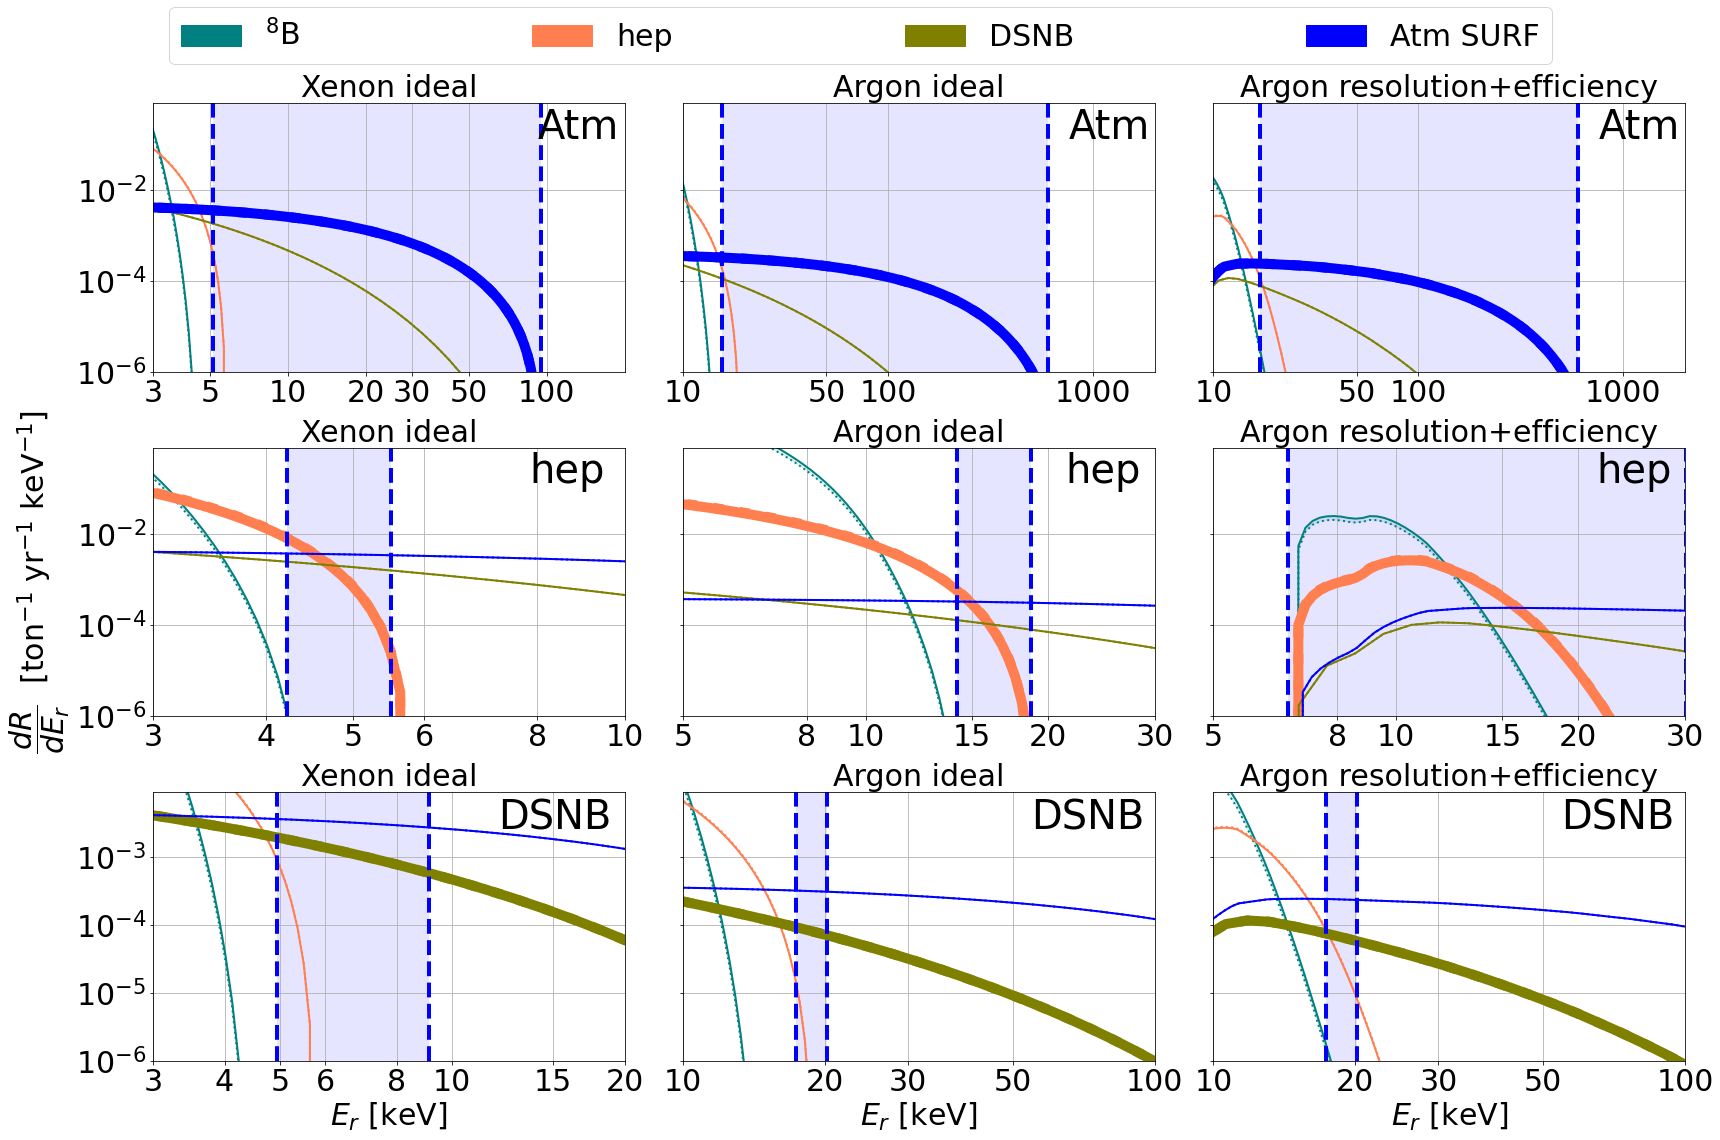

In [9]:

fig, ax = plt.subplots(nrows = len(signal_pcles), ncols = len(nucleons_effs_corrs_titles),
                       figsize = (8*len(nucleons_effs_corrs_titles), 5*len(signal_pcles)),
                      sharey='row')
custom_colors= [Patch(color = get_colors(pcle)[0]) for pcle in NR_pcles]
custom_labels = [get_official_pcle(p) for p in NR_pcles]

lines = ['-', ':']

for s, signal_pcle in enumerate(signal_pcles):
    
    for n, nuclei_eff_corr_title in enumerate(nucleons_effs_corrs_titles):
        
        xlabel = ''
        ylabel = ''
        pdf_label = ''
        if n == 0 and s == 1:
            pdf_label = 'pdf'
        if s == len(signal_pcles)-1:
            xlabel = r'$E_{r}$ '+ '[keV]'
            
        nuclei, eff,corr, title= nuclei_eff_corr_title
        method, Argon_xlim, Xenon_xlim, Argon_ylim, Xenon_ylim, Argon_xticks, Xenon_xticks = get_info_signalpcle(
                            signal_pcle, title)
        eff_corr = (eff,corr)
        if nuclei == 'Xenon':
            ax[s][n] = setup_cdfpdf_ax(ax[s][n], nuclei+ ' '+title, xlabel,ylabel, True, pdf_label, 30, 30, 
                     vlines = [0], hlines = [0], xlims = Xenon_xlim, ylims = Xenon_ylim, log = [0,0])      
            ax[s][n].text(max(Xenon_xlim)*0.95, max(Xenon_ylim)*0.8, get_official_pcle(signal_pcle),
                          horizontalalignment='right',
                            verticalalignment='top', fontsize = 40)
            
            
        elif nuclei == 'Argon':
            ax[s][n] = setup_cdfpdf_ax(ax[s][n], nuclei+ ' '+title, xlabel,ylabel, True, pdf_label, 30, 30, 
                     vlines = [0], hlines = [0], xlims = Argon_xlim, ylims = Argon_ylim, log = [0,0])     
            ax[s][n].text(max(Argon_xlim)*0.95, max(Argon_ylim)*0.8, get_official_pcle(signal_pcle), 
                          horizontalalignment='right', verticalalignment='top',
                          fontsize = 40)
            
        for NR_pcle in NR_pcles:
            if signal_pcle in NR_pcle:
                lw = 10
            else:
                lw = 2
            pdfs = []
            for m, metallicity in enumerate(metallicities):

                Er_keV, pdf = read_pcle_pdf(NR_pcle, nuclei, eff ,metallicity_model = metallicity, 
                                            ebinding = True, plot = False, corr = corr)

                pdfs.append(pdf)
                
                ax[s][n].loglog(Er_keV, pdf, lw = lw, 
                                ls = lines[m], color = get_colors(NR_pcle)[0])

            ax[s][n].fill_between(Er_keV, pdfs[0], pdfs[1], color = get_colors(NR_pcle)[0], alpha = 0.1)
            #ax[s][n].tick_params(which='major', length=1)
        
        Erbinning_files = glob.glob(signal_pcle+'*'+nuclei[:2]+'*Erbinning_range*')
        if len(Erbinning_files) ==1:
            Erbinning_file = Erbinning_files[0]
            print(Erbinning_file)

            dataf = pd.read_csv(Erbinning_file, index_col = 0)
            col = 'Er_range '+method

            for d, detector in enumerate(detectors):
                pcle = 'atmNu_'+detector+'_avg'
                Er_range = dataf[col][detector+'_'+metallicity+'_'+(''.join(eff_corr))]
                #print(Er_range)
                Er_start, Er_end = float(Er_range.split('-')[0]), float(Er_range.split('-')[1])
                print(Er_start, Er_end)
                ax[s][n].axvline(x = Er_start, color = get_colors(pcle)[0], lw = 4, ls = '--')
                ax[s][n].axvline(x = Er_end, color = get_colors(pcle)[0], lw = 4, ls = '--')
                ax[s][n].axvspan(Er_start, Er_end, facecolor=get_colors(pcle)[0], alpha=0.1)
    
        else:
            print('wrong selection Erbinning_file file')
            break
        if nuclei == 'Xenon':
            ax[s][n].set_xticks(Xenon_xticks)
        elif nuclei == 'Argon':
            ax[s][n].set_xticks(Argon_xticks)
        formatter = mtick.ScalarFormatter()
        formatter.set_scientific(False)
        ax[s][n].xaxis.set_major_formatter(formatter)
    
        ax[s][n].xaxis.set_major_formatter(mtick.FormatStrFormatter('%1g'))
        ax[s][n].minorticks_off()
        
     
fig.tight_layout()
fig.legend(custom_colors,custom_labels,
           bbox_to_anchor=(0.1, 1, 0.8, .102), loc='lower left',
           ncol=8, mode="expand", borderaxespad=0., fontsize = 30)            

In [10]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'XeAr_Erbinning_region_SURF.pdf')
print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/XeAr_Erbinning_region_SURF.pdf


In [ ]:

fig, ax = plt.subplots(nrows = len(signal_pcles), ncols = len(nucleons_effs_corrs_titles),
                       figsize = (8*len(nucleons_effs_corrs_titles), 5*len(signal_pcles)),
                      sharey='row')
custom_colors= [Patch(color = get_colors(pcle)[0]) for pcle in NR_pcles]
custom_labels = [get_official_pcle(p) for p in NR_pcles]

lines = ['-', ':']

for s, signal_pcle in enumerate(signal_pcles):
    
    for n, nuclei_eff_corr_title in enumerate(nucleons_effs_corrs_titles):
        
        xlabel = ''
        ylabel = ''
        pdf_label = ''
        if n == 0 and s == 1:
            pdf_label = 'pdf'
        if s == len(signal_pcles)-1:
            xlabel = r'$E_{r}$ '+ '[keV]'
            
        nuclei, eff,corr, title= nuclei_eff_corr_title
        method, Argon_xlim, Xenon_xlim, Argon_ylim, Xenon_ylim, Argon_xticks, Xenon_xticks = get_info_signalpcle(
                            signal_pcle, title)
        eff_corr = (eff,corr)
        if nuclei == 'Xenon':
            ax[s][n] = setup_cdfpdf_ax(ax[s][n], nuclei+ ' '+title, xlabel,ylabel, True, pdf_label, 30, 30, 
                     vlines = [0], hlines = [0], xlims = Xenon_xlim, ylims = Xenon_ylim, log = [0,0])      
            ax[s][n].text(max(Xenon_xlim)*0.95, max(Xenon_ylim)*0.8, get_official_pcle(signal_pcle),
                          horizontalalignment='right',
                            verticalalignment='top', fontsize = 40)
            
            
        elif nuclei == 'Argon':
            ax[s][n] = setup_cdfpdf_ax(ax[s][n], nuclei+ ' '+title, xlabel,ylabel, True, pdf_label, 30, 30, 
                     vlines = [0], hlines = [0], xlims = Argon_xlim, ylims = Argon_ylim, log = [0,0])     
            ax[s][n].text(max(Argon_xlim)*0.95, max(Argon_ylim)*0.8, get_official_pcle(signal_pcle), 
                          horizontalalignment='right', verticalalignment='top',
                          fontsize = 40)
            
        for NR_pcle in NR_pcles:
            if signal_pcle in NR_pcle:
                lw = 10
            else:
                lw = 2
            pdfs = []
            for m, metallicity in enumerate(metallicities):

                Er_keV, pdf = read_pcle_pdf(NR_pcle, nuclei, eff ,metallicity_model = metallicity, 
                                            ebinding = True, plot = False, corr = corr)

                pdfs.append(pdf)
                
                ax[s][n].loglog(Er_keV, pdf, lw = lw, 
                                ls = lines[m], color = get_colors(NR_pcle)[0])

            ax[s][n].fill_between(Er_keV, pdfs[0], pdfs[1], color = get_colors(NR_pcle)[0], alpha = 0.1)
            #ax[s][n].tick_params(which='major', length=1)
        
        Erbinning_files = glob.glob(signal_pcle+'*'+nuclei[:2]+'*Erbinning_range*')
        if len(Erbinning_files) ==1:
            Erbinning_file = Erbinning_files[0]
            print(Erbinning_file)

            dataf = pd.read_csv(Erbinning_file, index_col = 0)
            col = 'Er_range '+method

            for d, detector in enumerate(detectors):
                pcle = 'atmNu_'+detector+'_avg'
                Er_range = dataf[col][detector+'_'+metallicity+'_'+(''.join(eff_corr))]
                #print(Er_range)
                Er_start, Er_end = float(Er_range.split('-')[0]), float(Er_range.split('-')[1])
                print(Er_start, Er_end)
    

In [42]:
detectors = ['CJPL', 'Kamioka', 'LNGS','SURF' , 'SNOlab']
nucleons_effs_corrs_titles = [('Xenon', '', '', 'ideal'),
                       ('Argon', '', '', 'ideal'),
                       ('Argon', 'NR_Argon_tot', '_smear0.1' , 'resolution+efficiency corrected')]
atm_pcles = ['atmNu_'+detector+'_avg' for detector in detectors]
NR_pcles = ['8B', 'hep', 'dsnb']+atm_pcles
atm_pcles

['atmNu_CJPL_avg',
 'atmNu_Kamioka_avg',
 'atmNu_LNGS_avg',
 'atmNu_SURF_avg',
 'atmNu_SNOlab_avg']

In [46]:

for s, signal_pcle in enumerate(signal_pcles):
    
    for n, nuclei_eff_corr_title in enumerate(nucleons_effs_corrs_titles):
      
        nuclei, eff,corr, title= nuclei_eff_corr_title
        method, Argon_xlim, Xenon_xlim, Argon_ylim, Xenon_ylim = get_info_signalpcle(signal_pcle, title)
        eff_corr = (eff,corr)
        
        Erbinning_files = glob.glob(signal_pcle+'*'+nuclei[:2]+'*Erbinning_range*')
        if len(Erbinning_files) ==1:
            Erbinning_file = Erbinning_files[0]
            print(Erbinning_file)

            dataf = pd.read_csv(Erbinning_file, index_col = 0)
            col = 'Er_range '+method

            for d, detector in enumerate(detectors):
                pcle = 'atmNu_'+detector+'_avg'
                Er_range = dataf[col][detector+'_'+metallicity+'_'+(''.join(eff_corr))]
                #print(Er_range)
                Er_start, Er_end = float(Er_range.split('-')[0]), float(Er_range.split('-')[1])
                print(signal_pcle, nuclei, title, detector, '['+Er_range+']')
               
    
        else:
            print('wrong selection Erbinning_file file')
            break


atm_Xe_Erbinning_range.csv
atm Xenon ideal CJPL [5.003-90.729]
atm Xenon ideal Kamioka [5.003-90.729]
atm Xenon ideal LNGS [4.778-90.729]
atm Xenon ideal SURF [4.778-90.729]
atm Xenon ideal SNOlab [4.778-95.0]
atm_Ar_Erbinning_range.csv
atm Argon ideal CJPL [16.489-600.0]
atm Argon ideal Kamioka [15.798-600.0]
atm Argon ideal LNGS [15.798-600.0]
atm Argon ideal SURF [15.136-600.0]
atm Argon ideal SNOlab [15.136-600.0]
atm_Ar_Erbinning_range.csv
atm Argon resolution+efficiency corrected CJPL [18.35-600.0]
atm Argon resolution+efficiency corrected Kamioka [17.962-600.0]
atm Argon resolution+efficiency corrected LNGS [17.209-600.0]
atm Argon resolution+efficiency corrected SURF [16.489-600.0]
atm Argon resolution+efficiency corrected SNOlab [16.489-600.0]
hep_Xe_Erbinning_range.csv
hep Xenon ideal CJPL [3.572-5.46]
hep Xenon ideal Kamioka [3.572-5.46]
hep Xenon ideal LNGS [3.572-5.46]
hep Xenon ideal SURF [3.572-5.46]
hep Xenon ideal SNOlab [3.572-5.46]
hep_Ar_Erbinning_range.csv
hep Argo